In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings

DataSets

In [2]:
data_set = pd.read_csv('ALF_Data.csv')
print(data_set.shape)
f_title = data_set.columns
print(f_title)

(8785, 30)
Index(['Age', 'Gender', 'Region', 'Weight', 'Height', 'Body Mass Index',
       'Obesity', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol',
       'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried',
       'Income', 'Source of Care', 'PoorVision', 'Alcohol Consumption',
       'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes',
       'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')


Data Preprocessing

In [3]:
def get_mean(column):
    sum = 0
    cnt = 0
    for i in range(len(column)):
        if not pd.isnull(column[i]):
            try:
                sum += float(str(column[i]).strip())
                cnt += 1
            except (ValueError, TypeError) as e:
                cnt = cnt
    return sum / cnt       

Replace Numeric Empty Cell With Previous Value

In [4]:
def replace_numeric_empty_cell(column):
    mean = get_mean(column)
    print(mean)
    col = list()
    for i in range(len(column)):
        if pd.isnull(column[i]):
            try:
                col.append(mean)
            except (ValueError, TypeError) as e:
                print(f"Error: {e}")
                col.append(0)
        else:
            try:
                col.append(float(str(column[i]).strip()))
                
            except (ValueError, TypeError) as e:
                print(f"Error: {e}")
                col.append(0)
    return col

data_set['Waist'] = replace_numeric_empty_cell(data_set['Waist'])

96.84517766497416


In [5]:
columns_of_numeric = ['Weight', 'Height', 'Body Mass Index', 'Obesity', 'Waist','Maximum Blood Pressure', 'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Dyslipidemia', 'PVD', 'Physical Activity', 'Education', 'Unmarried', 'Income', 'PoorVision', 'Alcohol Consumption', 'HyperTension', 'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis', 'Family Hepatitis', 'Chronic Fatigue', 'ALF'] 
for column in columns_of_numeric:
    data_set[column] = replace_numeric_empty_cell(data_set[column])

79.100197881504
167.0281242727483
28.296022366097723
0.31595055915244263
96.84517766497414
125.83221318240774
71.5168272089428
51.82253649635037
152.58754419984032
204.4138442239708
0.1054069436539556
0.03927148548662493
2.0284900284900287
0.4316029663434113
0.3686547461898476
0.41736621196222456
0.06360982729262953
0.3040409789413773
0.40241240666283745
0.23323847467273762
0.11135147443925765
0.3117814456459875
0.06652972726235308
0.020503474199794966
0.029028571428571428
0.07733333333333334


Replace Text data to binary and empty cell as random

In [6]:
import random
def text_to_binary(column, positive_text, negative_text):
    col = list()
    for i in range(len(column)):
        if pd.isnull(column[i]):
            col.append(random.choice([0, 1]))
        elif str(column[i]).strip() == positive_text:
            col.append(1)
        elif str(column[i]).strip() == negative_text:
            col.append(0)
        else:
            col.append(0)
    return col

In [ ]:
columns_of_text = [
        ['Gender', 'M', 'F'], 
        ['Region', 'east', 'west', 'north', 'south'],
        ['Source of Care', 'Governament Hospital', 'Never Counsulted', 'Private Hospital', 'clinic'],]

for column_info_list in columns_of_text:
    data_set[column_info_list[0]] = text_to_binary(data_set[column_info_list[0]], column_info_list[1], column_info_list[2])

Visualize Correlation Between Features

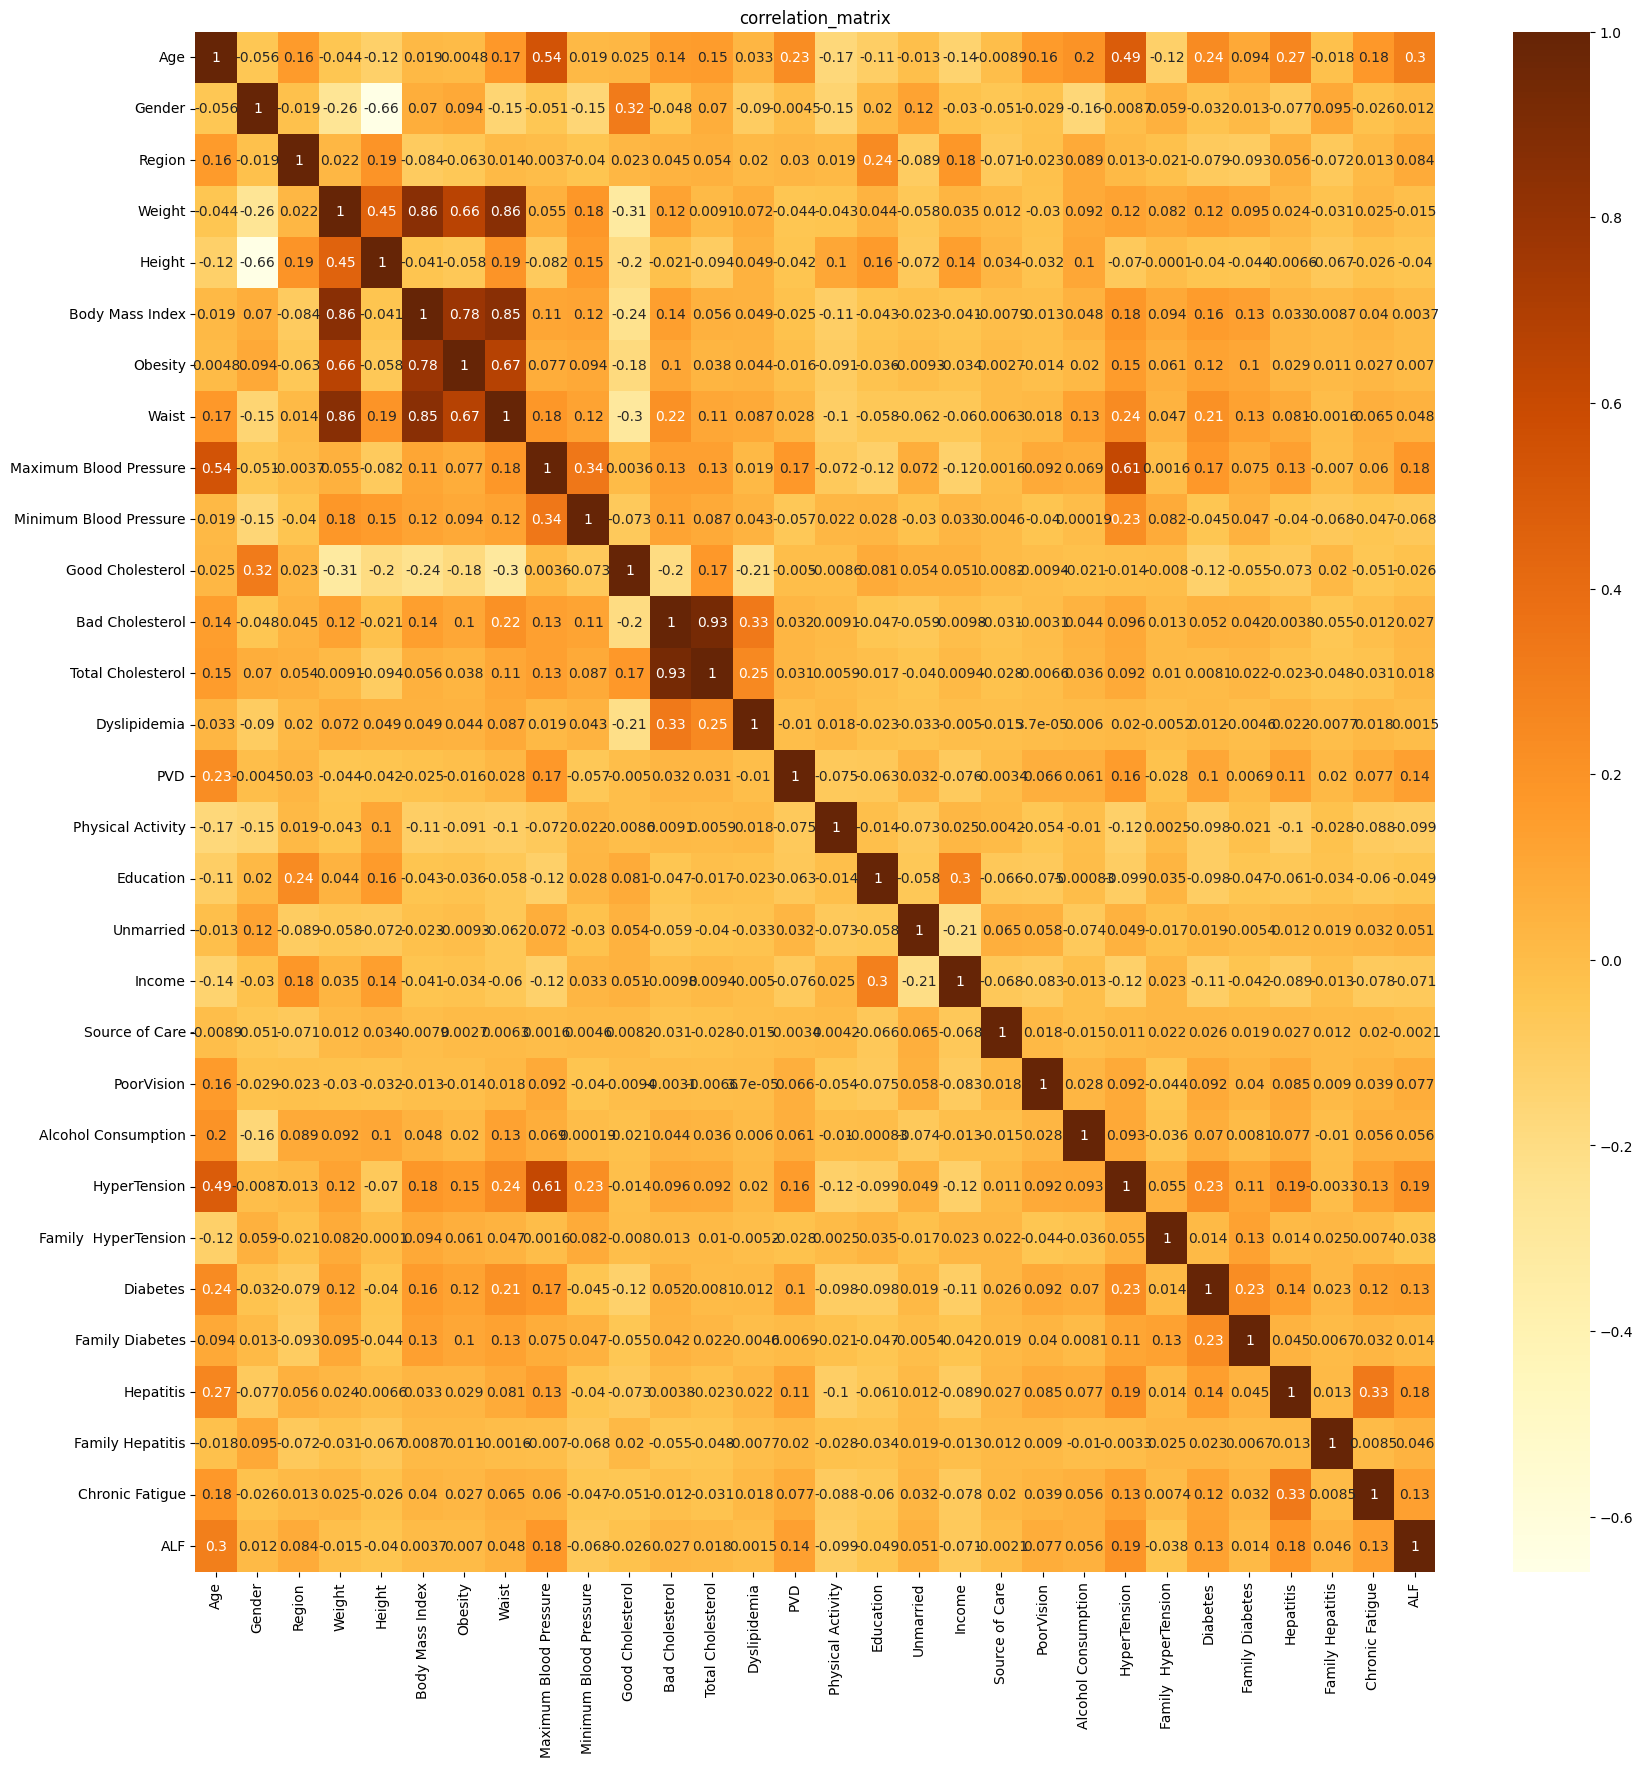

In [8]:
correlation_matrix = data_set[f_title].corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr")
plt.title("correlation_matrix")
plt.show()

Split Dependent and Independent Data

In [9]:
x = data_set.iloc[:,:-1]
y = data_set.iloc[:, -1]
print(x.shape, y.shape)

(8785, 29) (8785,)


Feature Selection

Recursive Feature Elimination

In [10]:
y = pd.cut(y, bins=3, labels=[0, 1, 2])  # Adjust based on your actual target

# Continue with your SVC model
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(x, y)

selected_features = selector.support_
x_selected = x.iloc[:, selected_features]
print(x_selected.shape)

(8785, 10)


Show the selected features

In [11]:
print(x_selected)

      Region  PVD  Physical Activity  Education  PoorVision  HyperTension  \
0          1  0.0                3.0        0.0     0.00000           0.0   
1          0  0.0                3.0        0.0     0.00000           0.0   
2          1  0.0                1.0        0.0     0.00000           0.0   
3          1  0.0                2.0        1.0     0.00000           0.0   
4          0  0.0                1.0        0.0     0.00000           1.0   
...      ...  ...                ...        ...         ...           ...   
8780       1  0.0                3.0        0.0     0.00000           0.0   
8781       0  1.0                2.0        0.0     0.00000           1.0   
8782       0  0.0                3.0        0.0     0.00000           1.0   
8783       1  0.0                2.0        1.0     0.00000           0.0   
8784       1  0.0                1.0        0.0     0.06361           1.0   

      Family  HyperTension  Hepatitis  Family Hepatitis  Chronic Fatigue  


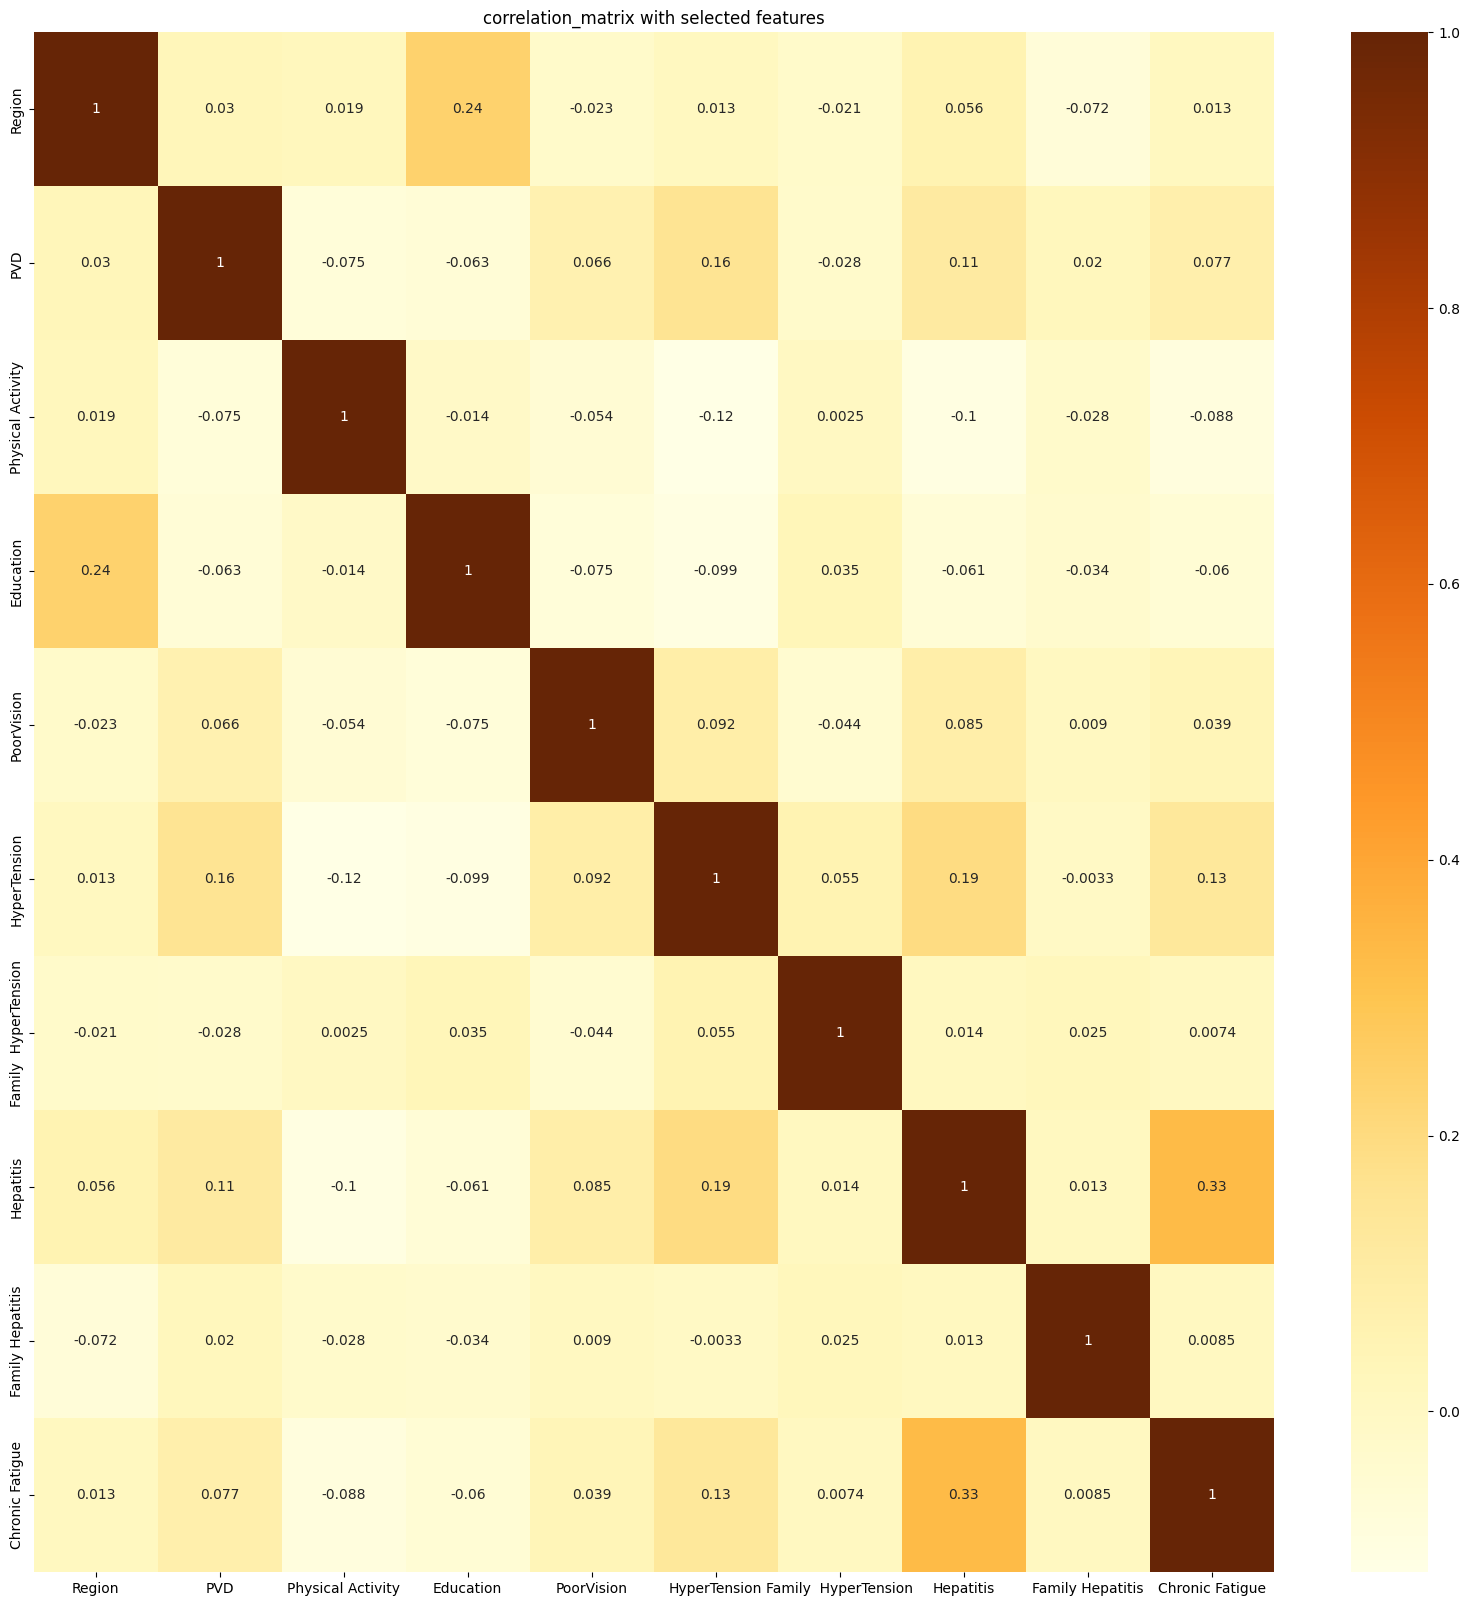

In [12]:
correlation_matrix = x_selected.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr")
plt.title("correlation_matrix with selected features")
plt.show()

Split train test data

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
# print(x_train)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
# print(x_train)
x_test = scaler.fit_transform(x_test)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6149, 29) (2636, 29) (6149,) (2636,)


In [14]:
x_train_fs,x_test_fs,y_train_fs,y_test_fs = train_test_split(x_selected,y,test_size=0.3,random_state=42)
# print(x_train)
scaler = StandardScaler()
x_train_fs = scaler.fit_transform(x_train_fs)
# print(x_train)
x_test_fs = scaler.fit_transform(x_test_fs)
print(x_train_fs.shape,x_test_fs.shape,y_train_fs.shape,y_test_fs.shape)

(6149, 10) (2636, 10) (6149,) (2636,)


Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def linear_regression(x_train, x_test, y_train, y_test):
    # Initialize the LinearRegression model
    clf = LinearRegression()

    # Train the model on the training data
    clf.fit(x_train, y_train)

    # Predict on the test data
    y_pred = clf.predict(x_test)

    # Return the evaluation metrics (Note: accuracy is more suitable for classification tasks)
    return accuracy_score(y_test, y_pred.round()), confusion_matrix(y_test, y_pred.round()), classification_report(y_test, y_pred.round())

# Assuming x_train, x_test, y_train, y_test, x_train_fs, x_test_fs, y_train_fs, y_test_fs are already defined

# Evaluate the model for both datasets
accuracy_lnr, conf_matrix_lnr, class_report_lnr = linear_regression(x_train, x_test, y_train, y_test)
accuracy_lnr_fs, conf_matrix_lnr_fs, class_report_lnr_fs = linear_regression(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

# Print results
print(f"Accuracy: {accuracy_lnr:.2f}")
print(f"Accuracy Fs: {accuracy_lnr_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_lnr)
print("Confusion Matrix Fs:\n", conf_matrix_lnr_fs)
print("Classification Report:\n", class_report_lnr)
print("Classification Report Fs:\n", class_report_lnr_fs)


Accuracy: 0.93
Accuracy Fs: 0.94
Confusion Matrix:
 [[2463   39    0]
 [   0    0    0]
 [ 115   19    0]]
Confusion Matrix Fs:
 [[2471   31    0]
 [   0    0    0]
 [ 122   12    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2502
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00       134

    accuracy                           0.93      2636
   macro avg       0.32      0.33      0.32      2636
weighted avg       0.91      0.93      0.92      2636

Classification Report Fs:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2502
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00       134

    accuracy                           0.94      2636
   macro avg       0.32      0.33      0.32      2636
weighted avg       0.90      0.94      0.92      2636



c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(a

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def logistic_regression(_x_train, _x_test, _y_train, _y_test):
    clf = LogisticRegression(random_state=42)
    
    clf.fit(_x_train, _y_train)
    
    _y_pred = clf.predict(_x_test)

    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred),  classification_report(_y_test, _y_pred)

# Evaluate the model
accuracy_lr, conf_matrix_lr, class_report_lr = logistic_regression(x_train, x_test, y_train, y_test)
accuracy_lr_fs, conf_matrix_lr_fs, class_report_lr_fs = logistic_regression(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Accuracy Fs: {accuracy_lr_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_lr)
print("Confusion Matrix fs:\n", conf_matrix_lr_fs)
print("Classification Report:\n", class_report_lr)
print("Classification Report fs:\n", class_report_lr_fs)

Accuracy: 0.95
Accuracy Fs: 0.95
Confusion Matrix:
 [[2489   13]
 [ 127    7]]
Confusion Matrix fs:
 [[2497    5]
 [ 131    3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2502
           2       0.35      0.05      0.09       134

    accuracy                           0.95      2636
   macro avg       0.65      0.52      0.53      2636
weighted avg       0.92      0.95      0.93      2636

Classification Report fs:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2502
           2       0.38      0.02      0.04       134

    accuracy                           0.95      2636
   macro avg       0.66      0.51      0.51      2636
weighted avg       0.92      0.95      0.93      2636



Support Vector Machine(SVM)

In [27]:
from sklearn.svm import SVC

def svm(_x_train, _x_test, _y_train, _y_test):
    classifier = SVC(kernel = 'linear', random_state = 24)
    classifier.fit(_x_train, _y_train)
    # Predicting the Test set results
    _y_pred = classifier.predict(_x_test)
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)
    
accuracy_svm, conf_matrix_svm, class_report_svm = svm(x_train, x_test, y_train, y_test)
accuracy_svm_fs, conf_matrix_svm_fs, class_report_svm_fs = svm(x_train_fs, x_test_fs, y_train_fs, y_test_fs)
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Accuracy fs: {accuracy_svm_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_svm)
print("Confusion Matrix fs:\n", conf_matrix_svm_fs)
print("Classification Report:\n", class_report_svm)
print("Classification Report fs:\n", class_report_svm_fs)

c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Accuracy: 0.95
Accuracy fs: 0.95
Confusion Matrix:
 [[2502    0]
 [ 134    0]]
Confusion Matrix fs:
 [[2502    0]
 [ 134    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2502
           2       0.00      0.00      0.00       134

    accuracy                           0.95      2636
   macro avg       0.47      0.50      0.49      2636
weighted avg       0.90      0.95      0.92      2636

Classification Report fs:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      2502
           2       0.00      0.00      0.00       134

    accuracy                           0.95      2636
   macro avg       0.47      0.50      0.49      2636
weighted avg       0.90      0.95      0.92      2636



c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(_x_train, _x_test, _y_train, _y_test):
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(_x_train, _y_train)
    _y_pred = regressor.predict(_x_test)
    _y_pred = np.round(_y_pred, decimals=0)
    
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

accuracy_rf, conf_matrix_rf, class_report_rf = random_forest(x_train, x_test, y_train, y_test)
accuracy_rf_fs, conf_matrix_rf_fs, class_report_rf_fs = random_forest(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Accuracy fs: {accuracy_rf_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Confusion Matrix fs:\n", conf_matrix_rf_fs)
print("Classification Report:\n", class_report_rf)
print("Classification Report_fs:\n", class_report_rf_fs)

Accuracy: 0.88
Accuracy fs: 0.72
Confusion Matrix:
 [[2307  191    4]
 [   0    0    0]
 [  77   56    1]]
Confusion Matrix fs:
 [[1893  477  132]
 [   0    0    0]
 [  97   35    2]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      2502
         1.0       0.00      0.00      0.00         0
         2.0       0.20      0.01      0.01       134

    accuracy                           0.88      2636
   macro avg       0.39      0.31      0.32      2636
weighted avg       0.93      0.88      0.90      2636

Classification Report_fs:
               precision    recall  f1-score   support

         0.0       0.95      0.76      0.84      2502
         1.0       0.00      0.00      0.00         0
         2.0       0.01      0.01      0.01       134

    accuracy                           0.72      2636
   macro avg       0.32      0.26      0.29      2636
weighted avg       0.90      0.72      0.80      2636



c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Prapya Saha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

def naive_bayes(_x_train, _x_test, _y_train, _y_test):
    naive_bayes_model = GaussianNB()
    naive_bayes_model.fit(_x_train, _y_train)
    
    _y_pred = naive_bayes_model.predict(_x_test)
    _y_pred = np.round(_y_pred, decimals=0)
    
    
    # Evaluate the model
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

accuracy_gnb, conf_matrix_gnb, class_report_gnb = naive_bayes(x_train, x_test, y_train, y_test)
accuracy_gnb_fs, conf_matrix_gnb_fs, class_report_gnb_fs = naive_bayes(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

print(f"Accuracy: {accuracy_gnb:.2f}")
print(f"Accuracy fs: {accuracy_gnb_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_gnb)
print("Confusion Matrix fs:\n", conf_matrix_gnb_fs)
print("Classification Report fs:\n", class_report_gnb_fs)

Accuracy: 0.86
Accuracy fs: 0.87
Confusion Matrix:
 [[2199  303]
 [  63   71]]
Confusion Matrix fs:
 [[2230  272]
 [  74   60]]
Classification Report fs:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      2502
           2       0.18      0.45      0.26       134

    accuracy                           0.87      2636
   macro avg       0.57      0.67      0.59      2636
weighted avg       0.93      0.87      0.89      2636



Decsion Tree(DT)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def decision_tree(_x_train, _x_test, _y_train, _y_test):
    # Initialize DecisionTreeClassifier with random_state for reproducibility
    clf = DecisionTreeClassifier(random_state=42)
    
    # Fit the model on the training data
    clf.fit(_x_train, _y_train)
    
    # Predict on the test data
    _y_pred = clf.predict(_x_test)

    # Return accuracy, confusion matrix, and classification report
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

# Evaluate the model for both datasets
accuracy_dt, conf_matrix_dt, class_report_dt = decision_tree(x_train, x_test, y_train, y_test)
accuracy_dt_fs, conf_matrix_dt_fs, class_report_dt_fs = decision_tree(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

# Print results for the decision tree
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Accuracy Fs: {accuracy_dt_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Confusion Matrix Fs:\n", conf_matrix_dt_fs)
print("Classification Report:\n", class_report_dt)
print("Classification Report Fs:\n", class_report_dt_fs)

Accuracy: 0.91
Accuracy Fs: 0.76
Confusion Matrix:
 [[2371  131]
 [  98   36]]
Confusion Matrix Fs:
 [[1968  534]
 [ 111   23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2502
           2       0.22      0.27      0.24       134

    accuracy                           0.91      2636
   macro avg       0.59      0.61      0.60      2636
weighted avg       0.92      0.91      0.92      2636

Classification Report Fs:
               precision    recall  f1-score   support

           0       0.95      0.79      0.86      2502
           2       0.04      0.17      0.07       134

    accuracy                           0.76      2636
   macro avg       0.49      0.48      0.46      2636
weighted avg       0.90      0.76      0.82      2636



KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def knn_model(_x_train, _x_test, _y_train, _y_test, n_neighbors=5):
    # Initialize KNeighborsClassifier with a specified number of neighbors
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Fit the model on the training data
    clf.fit(_x_train, _y_train)
    
    # Predict on the test data
    _y_pred = clf.predict(_x_test)

    # Return accuracy, confusion matrix, and classification report
    return accuracy_score(_y_test, _y_pred), confusion_matrix(_y_test, _y_pred), classification_report(_y_test, _y_pred)

# Evaluate the model for both datasets with default 5 neighbors
accuracy_knn, conf_matrix_knn, class_report_knn = knn_model(x_train, x_test, y_train, y_test)
accuracy_knn_fs, conf_matrix_knn_fs, class_report_knn_fs = knn_model(x_train_fs, x_test_fs, y_train_fs, y_test_fs)

# Print results for the KNN model
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Accuracy Fs: {accuracy_knn_fs:.2f}")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Confusion Matrix Fs:\n", conf_matrix_knn_fs)
print("Classification Report:\n", class_report_knn)
print("Classification Report Fs:\n", class_report_knn_fs)


Accuracy: 0.94
Accuracy Fs: 0.94
Confusion Matrix:
 [[2479   23]
 [ 125    9]]
Confusion Matrix Fs:
 [[2485   17]
 [ 128    6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2502
           2       0.28      0.07      0.11       134

    accuracy                           0.94      2636
   macro avg       0.62      0.53      0.54      2636
weighted avg       0.92      0.94      0.93      2636

Classification Report Fs:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      2502
           2       0.26      0.04      0.08       134

    accuracy                           0.94      2636
   macro avg       0.61      0.52      0.52      2636
weighted avg       0.92      0.94      0.93      2636



Show Confusion Matrix of ML Algorithm

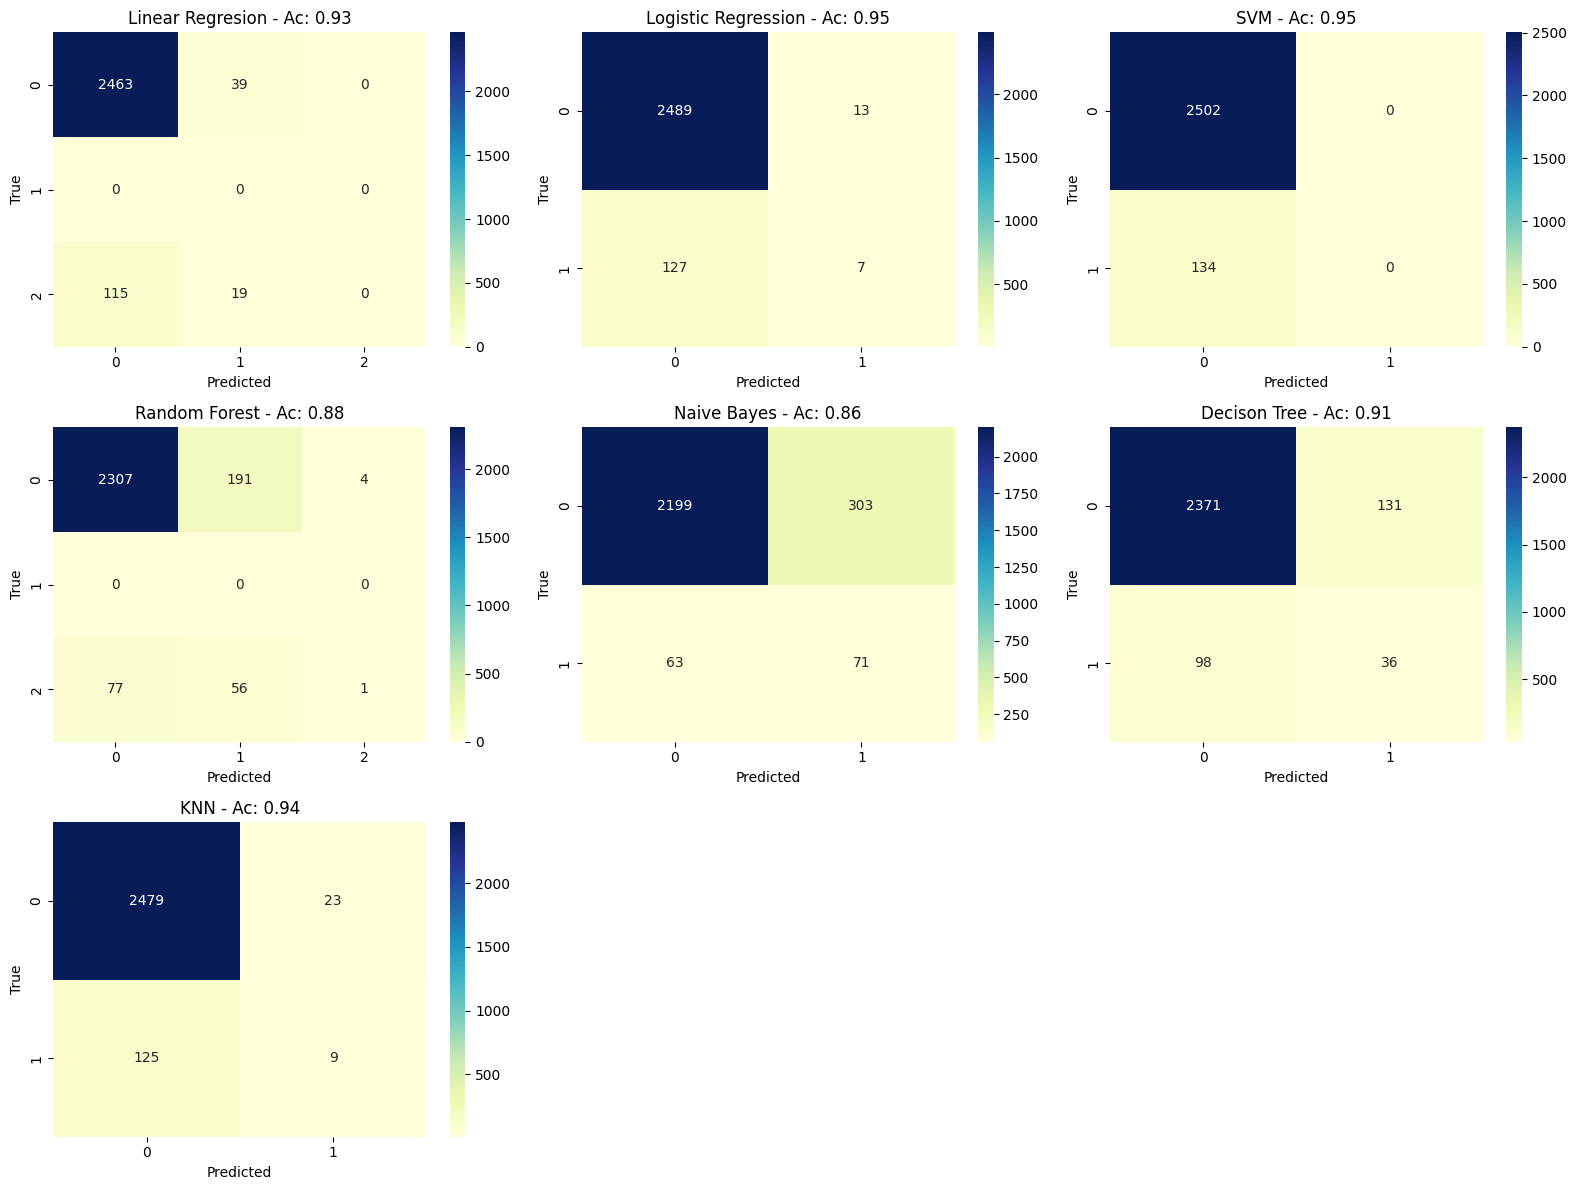

In [48]:
matrices = [conf_matrix_lnr, conf_matrix_lr, conf_matrix_svm, conf_matrix_rf, conf_matrix_gnb, conf_matrix_dt, conf_matrix_knn]  # Replace with your confusion matrices
accuracies = [accuracy_lnr, accuracy_lr, accuracy_svm, accuracy_rf, accuracy_gnb, accuracy_dt, accuracy_knn]
titles = ['Linear Regresion', 'Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'Decison Tree', 'KNN']

# Create a figure with a 2x2 grid
fig, axs = plt.subplots(3, 3, figsize=(16, 12))
axs[2, 1].axis('off')
axs[2, 2].axis('off')

# Flatten the axes array for easy iteration
axs = axs.flatten()


for ax, cm, title, accuracy in zip(axs, matrices, titles, accuracies):
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax)
    ax.set_title(f'{title} - Ac: {accuracy:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

Result Compresion Between All Featurs and Selected Features

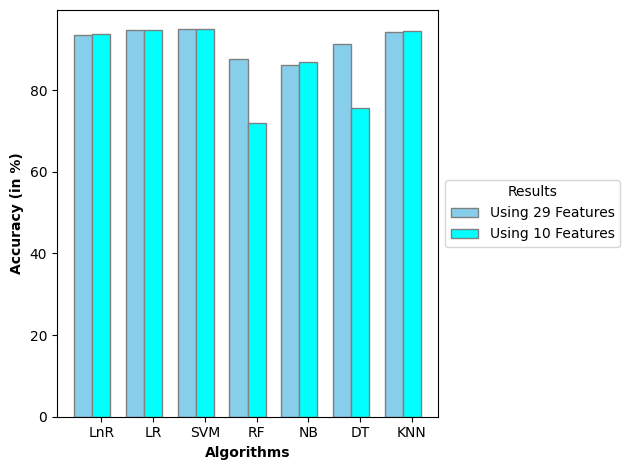

[93.43702579666162, 94.68892261001517, 94.9165402124431, 87.55690440060698, 86.11532625189682, 91.31259484066769, 94.38543247344461] [93.74051593323217, 94.84066767830045, 94.9165402124431, 71.88922610015175, 86.87405159332322, 75.53110773899849, 94.49924127465857]


In [49]:
algorithms = ['LnR', 'LR', 'SVM', 'RF', 'NB', 'DT', 'KNN']
shade1 = [accuracy_lnr*100, accuracy_lr*100, accuracy_svm*100, accuracy_rf*100, accuracy_gnb*100, accuracy_dt*100, accuracy_knn*100]
shade2 = [accuracy_lnr_fs*100, accuracy_lr_fs*100, accuracy_svm_fs*100, accuracy_rf_fs*100, accuracy_gnb_fs*100, accuracy_dt_fs*100, accuracy_knn_fs*100]

# Set the bar width
bar_width = 0.35

# Positions for each bar on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]

# Create the grouped bar chart
plt.bar(r1, shade1, color='skyblue', width=bar_width, edgecolor='grey', label='Using 29 Features')
plt.bar(r2, shade2, color='cyan', width=bar_width, edgecolor='grey', label='Using 10 Features')

# Add labels
plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('Accuracy (in %)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)

# Move the legend to the right of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")

# Adjust the layout to make room for the legend
plt.tight_layout()

# Display the chart
plt.show()

print(shade1, shade2)